In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

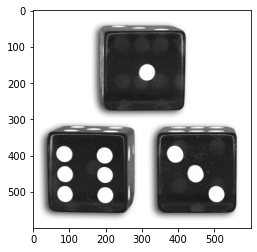

In [8]:
color_img = cv2.imread( "2.jpg" )
gray_img = cv2.cvtColor(color_img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = "gray")

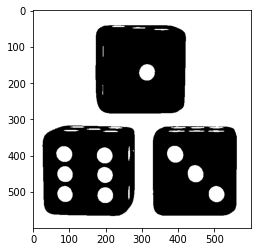

In [9]:
_ , th1 = cv2.threshold(gray_img , 200 , 255 , cv2.THRESH_BINARY)
plt.imshow(th1, cmap = "gray")

In [10]:
img = cv2.imread( "Input/2.jpg")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
lap = cv2.Laplacian(gray_img ,cv2.CV_16S)
lap = np.uint8(np.absolute(lap))


cir = cv2.medianBlur(lap, 5)

circles = cv2.HoughCircles(cir, cv2.HOUGH_GRADIENT,1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    center = (i[0], i[1])
    
    cv2.circle(color_img, center,1, (0,255,0), 3)
    
    radius = i[2]
    cv2.circle(color_img, center, radius, (0,255,0), 3)

plt.imshow(color_img, cmap = "gray")
    

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


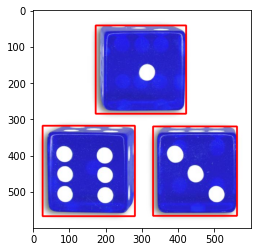

In [11]:
th1 = 255 - th1
contours , _ = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
counter = 0
dice_list = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv2.boundingRect(c)
        dice = th1[y:y+h,x:x+w]
        dice_list.append(dice)
        cv2.rectangle(color_img, (x,y) , (x+w,y+h), (255,0,0), 4)
        counter +=1   

plt.imshow(color_img, cmap = "gray")

In [12]:
dice_list[0] = 255 - dice_list[0]
dice1_dots = cv2.HoughCircles(dice_list[0], cv2.HOUGH_GRADIENT,1,150,param1=100, param2=30,minRadius=0, maxRadius=0)
dice1_dots = np.uint16(np.around(dice1_dots))
cv2.putText(color_img, text= f'Dice 1 value is : {len(dice1_dots[0, :])}', org=(20, 25), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)

dice_list[1] = 255 - dice_list[1]   
dice2_dots = cv2.HoughCircles(dice_list[1], cv2.HOUGH_GRADIENT,1,20,param1=100, param2=30,minRadius=0, maxRadius=0)
dice2_dots = np.uint16(np.around(dice2_dots))
cv2.putText(color_img, text= f'Dice 2 value is : {len(dice2_dots[0, :])

for i in dice2_dots[0, :]:
        center = (i[0], i[1])
        
        cv2.circle(dice_list[1], center,1, (127,127,127), 3)
        
        radius = i[2]
        cv2.circle(dice_list[1], center, radius, (127,127,127), 3)
        
plt.imshow(dice_list[1], cmap = "gray")


SyntaxError: EOL while scanning string literal (Temp/ipykernel_11268/3892933357.py, line 9)

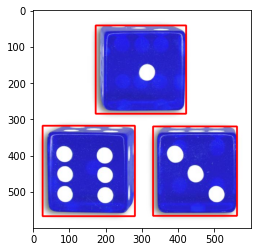

In [13]:
plt.imshow(color_img, cmap = "gray")